In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import math
import os

In [4]:
OD_matrix = pd.read_csv(r"C:\Users\oscar\Documents\2023-2\Trabajo\OD_Matrix_total.csv")
OD_matrix = OD_matrix.set_index('Unnamed: 0')
OD_matrix.index.name = None
Viajes = pd.read_excel(r"C:\Users\oscar\Documents\2023-2\Trabajo\cuantificacion viajes.xlsx")
Viajes = Viajes[['hora', 'viajes']]
Entradas = pd.read_excel(r"C:\Users\oscar\Documents\2023-2\Trabajo\Demanda usuarios  2006-2023.xlsx")
Entradas = Entradas[['Año', 'TOTAL USUARIOS']]


In [3]:
# Cálculo de entradas totales 
Ent = Entradas[(Entradas['Año'] == 2023) & (Entradas['TOTAL USUARIOS'] > 100000)]
Total_ent = Ent['TOTAL USUARIOS'].mean()
Total_ent

115389.17307692308

In [5]:
Viajes['Norm'] = Viajes['viajes']/Viajes['viajes'].sum()
Viajes['Total'] = Viajes['Norm']*Total_ent
Viajes = Viajes.set_index('hora')
Viajes.index.name = None


In [6]:
in_stations = OD_matrix.sum(axis = 1)/OD_matrix.sum().sum()


In [7]:
OD_matrix = OD_matrix.div(OD_matrix.sum(axis = 1), axis = 0)


In [8]:
c = np.dot(np.array(OD_matrix), np.array(in_stations))
estaciones = pd.read_excel(r'C:\Users\oscar\Documents\2023-2\Trabajo\Datos_Megabus\Estaciones_Megabus.xlsx')
#estaciones['index_station'] = estaciones.index + 1
OD_matrix_estaciones = pd.DataFrame(index = estaciones['Estación'], columns = estaciones['Estación'])
OD_matrix_estaciones.index.name = None
OD_matrix_estaciones.columns.name = None
for index1, i in enumerate(OD_matrix_estaciones.index):
    for index2, j in enumerate(OD_matrix_estaciones.columns):
        OD_matrix_estaciones.loc[i,j] = OD_matrix.loc[index1+1, str(index2+1)]
        s = 1


Text(0.4, 0.8, 'Exit profile, $\\mathbf{I}$')

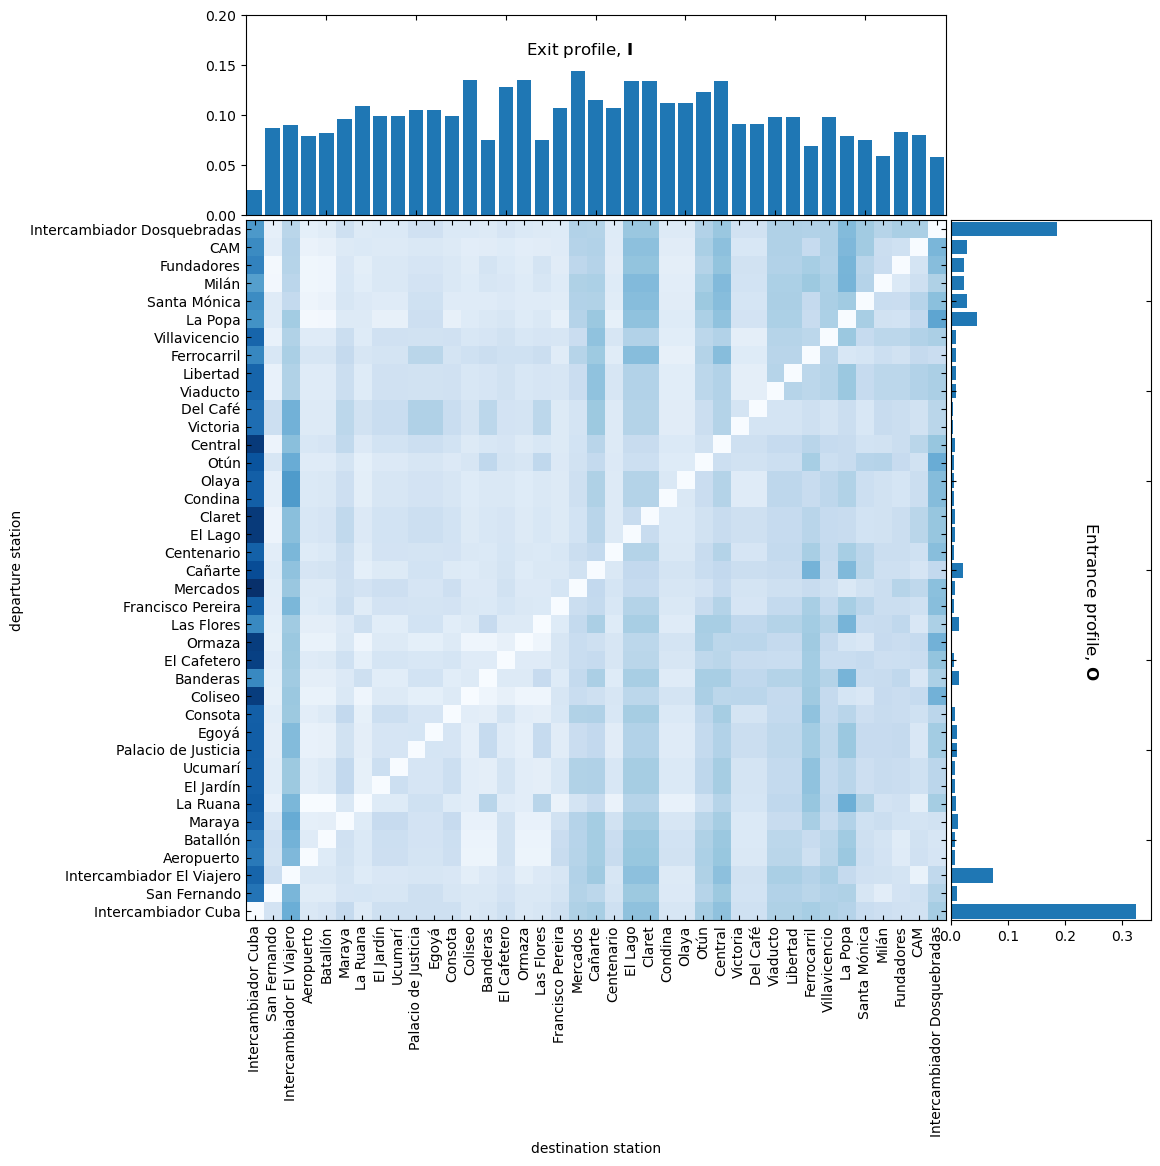

In [9]:
# The figure parameters
# main width
wi=7
# main height
hi=7
# left margin
lm=2
# right margin
rm=2
# bottom margin
bm=2
# top margin
tm=2
# horizontal gap
hg=0.05
# vertical gap
vg=0.05
# histogram width
hw=2
# horizontal hap between panels
hgp = 2
# the number of figures in total
Nc = 2

# The calculations
sx=Nc*wi+lm+rm+hg+hw+(Nc-1)*hgp  # Figure x
sy=hi+bm+tm+vg+hw  # Figure y
t=(sy-tm)/sy
b=bm/sy
l=lm/sx
r=(sx-rm)/sx
hr=vg/hi
wr=hg/wi

# definitions for the axes
left, width = lm, wi
bottom, height = bm, hi
bottom_h = bottom + width + hg
left_h = left+width+hg

rect_scatter = [left/sx, bottom/sy, width/sx, height/sy]
rect_histx = [left/sx, bottom_h/sy, width/sx, hw/sy]
rect_histy = [left_h/sx, bottom/sy, hw/sx, height/sy]

###################################
# start with a rectangular Figure
plt.figure(figsize=(sx, sy))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# the scatter plot:
axScatter.imshow(np.sqrt(OD_matrix_estaciones.astype('float')), cmap='Blues', extent=[0.5,len(OD_matrix_estaciones.index)+0.5,0.5, len(OD_matrix_estaciones.index)+0.5], origin = 'lower')

axHistx.bar(np.arange(1,40,1),c)
#axHistx.fill_between(np.arange(1,40,1),c)
axHisty.barh(np.arange(1,40,1), in_stations)
#axHisty.fill_betweenx(np.arange(1,40,1),in_stations)

axHistx.set_xlim(axScatter.get_xlim())
axHistx.set_ylim(0,0.2)
axHisty.set_ylim(axScatter.get_ylim())
axHisty.set_xlim(0, 0.35)

# Setting the axes
axHistx.tick_params(axis='x',direction="in", which='both', top = True, right= True, labelbottom=False, labelleft=False)
axHistx.tick_params(axis='y', left = True, right= False, labelbottom=False, labelleft=True)
#axHistx.set_xticks(np.arange(0, 40, step=5))
axHisty.tick_params(axis='y', direction="in", which='both', top = True, right= True, labelleft= False, labeltop=False, labelbottom = False)
axHisty.tick_params(axis='x', top = False, bottom = True, labelleft= False, labeltop=False, labelbottom = True)
axScatter.tick_params(direction="in", which='both', top = True, right= True, labelbottom=True, labeltop = False)
axScatter.set_xticks(np.arange(1,40,1))
axScatter.set_yticks(np.arange(1,40,1))
axScatter.set_xticklabels(OD_matrix_estaciones.index, rotation = 90)
axScatter.set_yticklabels(OD_matrix_estaciones.index)

# Setting the labels
axScatter.set_ylabel("departure station")
axScatter.set_xlabel("destination station")
axHisty.text(0.65,0.35,"Entrance profile, $\mathbf{O}$", rotation=-90, transform=axHisty.transAxes, fontsize=12)
axHistx.text(0.4,0.8,"Exit profile, $\mathbf{I}$", transform=axHistx.transAxes, fontsize=12)



In [44]:
df1 = pd.read_csv(r"C:\Users\oscar\Documents\2023-2\Trabajo\BRT_C_MEGABUS-main\conf\station_list.txt", header=None, names=['Data'], encoding='latin-1')
ord_st = []
for i in df1['Data']:
    ord_st.append(i.split(' ', 1)[1])
ord_st

['Intercambiador Cuba',
 'San Fernando',
 'Intercambiador El Viajero',
 'Aeropuerto',
 'Batallón',
 'Maraya',
 'El Jardín',
 'La Ruana',
 'Ucumarí',
 'Egoyá',
 'Consota',
 'Coliseo',
 'El Cafetero',
 'Ormaza',
 'Francisco Pereira',
 'Mercados',
 'Centenario',
 'El Lago',
 'Condina',
 'Otún',
 'Victoria',
 'Del Café',
 'Ferrocarril',
 'Libertad',
 'Villavicencio',
 'La Popa',
 'Santa Mónica',
 'Milán',
 'Fundadores',
 'CAM',
 'Intercambiador Dosquebradas',
 'Viaducto',
 'Central',
 'Claret',
 'Olaya',
 'Cañarte',
 'Las Flores',
 'Banderas',
 'Palacio de Justicia']

In [34]:
IN1 = in_stations.to_frame()
IN1 = IN1.set_index(OD_matrix_estaciones.index)
orden_entrada = []
for i in IN1.index:
    orden_entrada.append(IN1.loc[i, 0])
wd = os.path.abspath('')
name = os.path.join(wd, os.pardir,'conf','IN.txt')
with open('IN.txt', 'a') as f:
 #   f.writelines([str(item) for item in orden_entrada])
    for i in orden_entrada:
        f.write(str(i))
        f.write('\n')
    f.close()

In [43]:

text = ''
for i in orden_entrada:
    text = text + f'{i}' + ' \n'

with open('..\conf\IN.txt', 'w') as f:
    f.write(text)

In [46]:
text = ''
for i, station in enumerate(ord_st):
    for j, station_d in enumerate(ord_st):
        value = OD_matrix_estaciones.loc[station, station_d]
        text = text + f'{i} {j} {value}\n'

with open('..\conf\OD_matrix.txt', 'w') as f:
    f.write(text)

In [45]:
OD_matrix_estaciones

,Intercambiador Cuba,San Fernando,Intercambiador El Viajero,Aeropuerto,Batallón,Maraya,La Ruana,El Jardín,Ucumarí,Palacio de Justicia,...,Viaducto,Libertad,Ferrocarril,Villavicencio,La Popa,Santa Mónica,Milán,Fundadores,CAM,Intercambiador Dosquebradas
Intercambiador Cuba,0.0,0.012598,0.093021,0.00829,0.010163,0.024051,0.006038,0.015922,0.015922,0.016376,...,0.039499,0.039499,0.044771,0.039499,0.034133,0.020251,0.016991,0.014858,0.013369,0.046066
San Fernando,0.204623,0.0,0.080469,0.005098,0.005098,0.010621,0.010987,0.009637,0.009637,0.015602,...,0.036733,0.036733,0.0308,0.036733,0.03926,0.009522,0.003955,0.012501,0.015138,0.035647
Intercambiador El Viajero,0.238496,0.017116,0.0,0.007615,0.007939,0.011523,0.005751,0.008569,0.008569,0.009322,...,0.042953,0.042953,0.034339,0.042953,0.023838,0.014502,0.013319,0.011803,0.001732,0.025973
Aeropuerto,0.192693,0.011674,0.076575,0.0,0.005661,0.013996,0.007257,0.016761,0.016761,0.011923,...,0.03074,0.03074,0.016122,0.03074,0.054188,0.017625,0.01251,0.005253,0.014515,0.010368
Batallón,0.201015,0.01231,0.085728,0.005268,0.0,0.014885,0.007167,0.017457,0.017457,0.012542,...,0.029087,0.029087,0.02079,0.029087,0.050424,0.016401,0.011641,0.004888,0.013506,0.009647
Maraya,0.242384,0.008678,0.098026,0.003027,0.003431,0.0,0.005651,0.022165,0.022165,0.012171,...,0.020802,0.020802,0.044284,0.020802,0.036327,0.015146,0.01826,0.013211,0.011327,0.014249
La Ruana,0.260312,0.001947,0.079012,0.0,0.0,0.007914,0.0,0.005812,0.005812,0.015128,...,0.026824,0.026824,0.057559,0.026824,0.091531,0.037466,0.012427,0.014869,0.003833,0.047419
El Jardín,0.251574,0.004277,0.053381,0.004105,0.005914,0.025081,0.002708,0.0,0.017848,0.010164,...,0.024819,0.024819,0.063154,0.024819,0.032257,0.017276,0.021088,0.019435,0.014984,0.029933
Ucumarí,0.251574,0.004277,0.053381,0.004105,0.005914,0.025081,0.002708,0.017848,0.0,0.010164,...,0.024819,0.024819,0.063154,0.024819,0.032257,0.017276,0.021088,0.019435,0.014984,0.029933
Palacio de Justicia,0.254538,0.003423,0.07329,0.001929,0.002411,0.013781,0.003469,0.010236,0.010236,0.0,...,0.028086,0.028086,0.048155,0.028086,0.0541,0.022308,0.022308,0.023841,0.008572,0.047853
